In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.io.matlab import loadmat

In [3]:
df = pd.DataFrame(
    columns=[
        'Well',
        'Number of cells',
        'Exp growth',
        'Start growth',
        'Correlation'
    ],
)

In [4]:
data = '''Well #	Number of cells	Exp growth	Start growth	Correlation
1	0	0		
2	3	1	9	0
3	5	1	3	0
4	1	1	5	0
5	3	0		1
6	0	0		
7	2	0		1
8	3	1	9	0
9	1	1	10	1
10	2	0		1
11	2	0		0
12	3	1	10	0
13	2	0		
14	3	1	10	0
15	4	1	5	0
16	4	0		0
17	5	1	4	0
18	3	1	4	0
19	5	1	4	0
20	1	0		0
21	0			
22	2	0		0
23	3	1	4, 10	0
24	0			
25	2	1	11	0
26	4	1	3	0
27	1	0		1
28	4	1	3,10	0
29	3	1	9	0.5
30	2	1	10	1
31	2	1	7	1
32	4	1	3	0
33	3	0		0
34	3	1	4, 11	0
35	3	1	3	0
36	0			
37	0			
38	3	1	5	0
39	1	0		0
40	1	0		0
				

'''.splitlines()

In [5]:
ddd = list(map(lambda s: s.split('\t'), data))

In [6]:
def convert(string):
    try:
        return int(string)
    except ValueError:
        return None
    except TypeError:
        return int(string[1])

In [7]:
columns = ddd[0]
data = list(map(lambda l: map(convert, l), ddd[1:]))

In [8]:
df = pd.DataFrame(columns=columns, data=data, dtype=int)

In [9]:
df.head()

Well #  Number of cells  Exp growth  Start growth  Correlation
0     1.0              0.0         0.0           NaN          NaN
1     2.0              3.0         1.0           9.0          0.0
2     3.0              5.0         1.0           3.0          0.0
3     4.0              1.0         1.0           5.0          0.0
4     5.0              3.0         0.0           NaN          1.0

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11e01bd60>]],
      dtype=object)

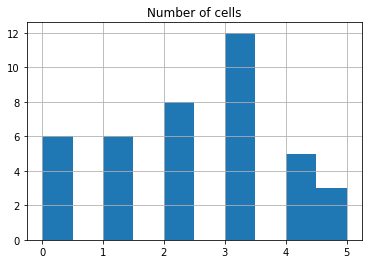

In [10]:
df.hist('Number of cells')

Text(0.5, 0, 'Initital number of cells')

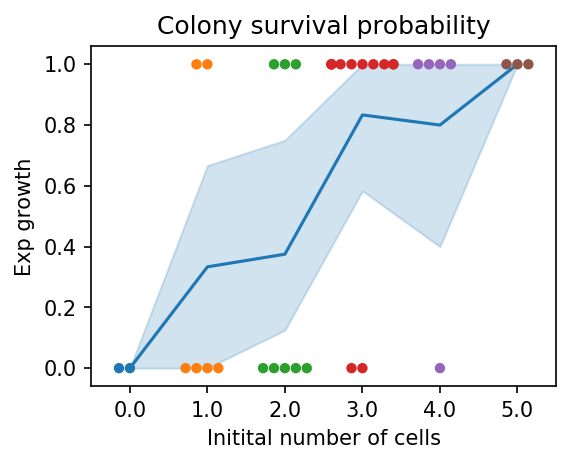

In [20]:
fig, ax = plt.subplots(figsize=(4,3), dpi=150)
sns.lineplot(data=df, y='Exp growth', x='Number of cells')
sns.swarmplot(data=df, y='Exp growth', x='Number of cells')
plt.title('Colony survival probability')
plt.xlabel('Initital number of cells')

Text(0.5, 0, 'Initital number of cells')

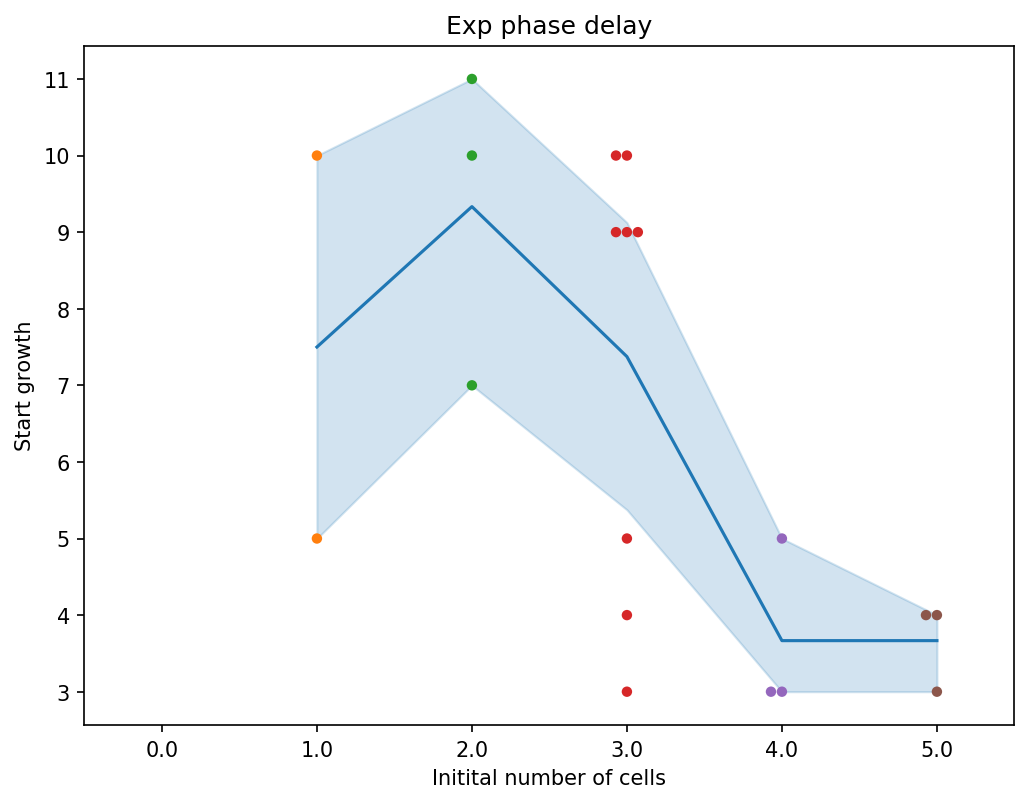

In [22]:
fig, ax = plt.subplots(figsize=(8,6), dpi=150)
ax = sns.lineplot(data=df, y='Start growth', x='Number of cells')
sns.swarmplot(ax=ax, data=df, y='Start growth', x='Number of cells')
plt.title('Exp phase delay')
plt.xlabel('Initital number of cells')

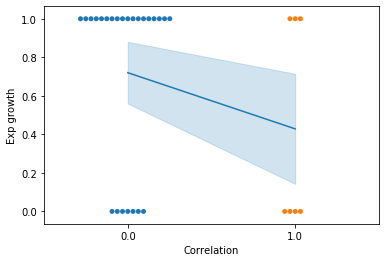

In [13]:
sns.swarmplot(data=df, y='Exp growth', x='Correlation')
sns.lineplot(data=df, y='Exp growth', x='Correlation')


In [26]:
df.dtypes

Well #             float64
Number of cells    float64
Exp growth         float64
Start growth       float64
Correlation        float64
dtype: object